In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import DyNetSet as dns

In [2]:
def shortest_path_with_edges(G, source, target, weight="weight"):
    # Get shortest path nodes
    path_nodes = nx.shortest_path(G, source=source, target=target, weight=weight)
    
    # Extract edges and their attributes
    path_edges = [(path_nodes[i], path_nodes[i+1]) for i in range(len(path_nodes)-1)]
    path_edges_with_data = [(u, v, G[u][v]) for u, v in path_edges]

    return path_nodes, path_edges_with_data

In [3]:
# Depth-First Search (DFS)
def is_predecessor(G, target_node, starting_node):
    visited = set()
    stack = [starting_node]
    while stack:
        node = stack.pop()
        if node == target_node:
            return True
        if node not in visited:
            visited.add(node)
            # Traverse backwards (predecessors are other nodes at distance 1)
            stack.extend(G.predecessors(node))  
    return False

In [4]:
# Tree Graph Example with Bridge
edge_bundle = [(1,2,{'weight':5}),
               (1,3,{'weight':5}), # !
               # bridge
               (2,3,{'weight':5}),
               # branch 1
               (2,4,{'weight':5}),
               (2,5,{'weight':5}),
               (2,6,{'weight':5}),
                # branch 2
               (10,7,{'weight':5}),
               (3,7,{'weight':5}), # !
               (3,8,{'weight':5}),
               (3,9,{'weight':5}),
               ]
#for e in edge_bundle:
G = nx.DiGraph()
G.add_edges_from(edge_bundle)
print(G, G.size('weight'))
temporary_edge_bundle = [(7,1, {'weight':5})]

DiGraph with 10 nodes and 10 edges 50.0


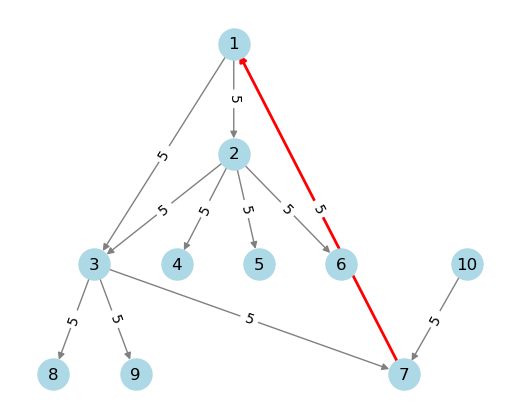

In [5]:
# Draw the tree using a hierarchical layout
T = G.copy()

T.add_edge(temporary_edge_bundle[0][0],
           temporary_edge_bundle[0][1], 
           weight = temporary_edge_bundle[0][2]['weight'])
plt.figure(figsize=(5, 4))
pos = nx.nx_agraph.graphviz_layout(T, prog="dot")  # Uses Graphviz for tree layout
nx.draw(G, pos, with_labels=True, node_size=500, node_color="lightblue", edge_color="gray")
# Draw the highlighted edge in red
nx.draw_networkx_edges(T, pos, edgelist=[temporary_edge_bundle[0]], edge_color="red", width=2)
# Draw edge labels (weights)
edge_labels = {(u, v): T[u][v]['weight'] for u, v in T.edges()}
nx.draw_networkx_edge_labels(T, pos, edge_labels=edge_labels, font_color='black', font_size=10)

plt.show()

In [32]:
# to maximize the flow cycle cancelling using the Dijkstra algorithm
# the weights need to be negative
def negGraph (G, bundle):
    # Create a copy of the graph with negative edge weights
    G_neg = G.copy()
    for u, v, data in G_neg.edges(data=True):
        data['weight'] = -data['weight']  # Negate the weight
    # Create a copy of the bundle with negative weights
    bundle = [(s,t,{'weight':(-1)*w['weight']}) for s,t,w in bundle]
    # return
    return G_neg, bundle

In [33]:
G_neg, temporary_edge_bundle = negGraph (G, temporary_edge_bundle)
#----------------------------------
candidate = temporary_edge_bundle[0]
# is 1 predecessor of 7?
if is_predecessor(G_neg, candidate[1], candidate[0]):
    # path_edges_with_data
    path_nodes, path_edges_with_data = shortest_path_with_edges(G_neg, candidate[1], candidate[0], weight="weight")
    # delete from graph
    G_neg.remove_edges_from(path_edges_with_data)
    # find minimum weight
    path_edges_with_data.append(candidate)
    path_edges_with_data = sorted(path_edges_with_data, key= lambda x: x[2]['weight'])
    min_weight = path_edges_with_data[0][2]['weight']
    path_edges_to_add = [(s,t,{'weight':w['weight']-min_weight}) for s,t,w in path_edges_with_data[1:]]
    path_edges_to_add = [e for e in path_edges_to_add if e[2]['weight'] != 0]
    # update graph 
    G_neg.add_edges_from(path_edges_to_add)

In [34]:
candidate

(7, 1, {'weight': -5})

In [35]:
path_edges_with_data

[(1, 2, {'weight': -5}),
 (2, 3, {'weight': -5}),
 (3, 7, {'weight': -5}),
 (7, 1, {'weight': -5})]

In [36]:
path_edges_to_add

[]

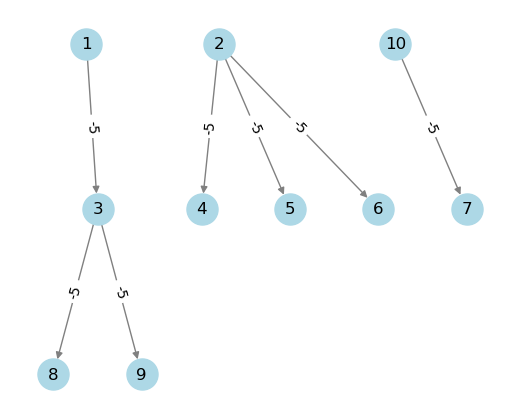

In [37]:
plt.figure(figsize=(5, 4))
T = G_neg.copy()
pos = nx.nx_agraph.graphviz_layout(T, prog="dot")  # Uses Graphviz for tree layout
nx.draw(T, pos, with_labels=True, node_size=500, node_color="lightblue", edge_color="gray")
# Draw edge labels (weights)
edge_labels = {(u, v): T[u][v]['weight'] for u, v in T.edges()}
nx.draw_networkx_edge_labels(T, pos, edge_labels=edge_labels, font_color='black', font_size=10)

plt.show()

------------

In [2]:
# Tree Graph Example with Bridge
edge_bundle = [(1,2,{'weight':5}),
               (1,3,{'weight':5}), # !
               # bridge
               (2,3,{'weight':5}),
               # branch 1
               (2,4,{'weight':5}),
               (2,5,{'weight':5}),
               (2,6,{'weight':5}),
                # branch 2
               (10,7,{'weight':5}),
               (3,7,{'weight':5}), # !
               (3,8,{'weight':5}),
               (3,9,{'weight':5}),
               ]
#for e in edge_bundle:
G = nx.DiGraph()
G.add_edges_from(edge_bundle)
print(G, G.size('weight'))
temporary_edge_bundle = [(7,1, {'weight':5})]

DiGraph with 10 nodes and 10 edges 50.0


{(1, 2): Text(116.99995646439493, 198.0000870712102, '5'),
 (1, 3): Text(81.00030212150887, 162.00120848603547, '5'),
 (2, 3): Text(98.99875857308507, 125.99875857308507, '5'),
 (2, 4): Text(134.99999999999997, 126.00039679929617, '5'),
 (2, 5): Text(171.0012414269149, 125.99875857308507, '5'),
 (2, 6): Text(206.99956174381072, 126.00021912809464, '5'),
 (3, 7): Text(161.99822616926392, 54.000645029358566, '5'),
 (3, 8): Text(45.00004353560506, 54.000087071210146, '5'),
 (3, 9): Text(80.99995646439493, 54.000087071210146, '5'),
 (10, 7): Text(306.00181681942195, 54.00145345553756, '5')}

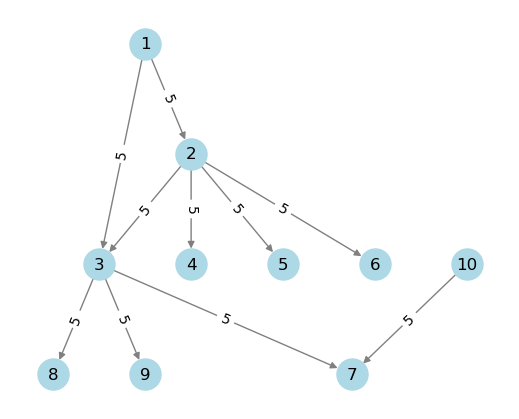

In [3]:
plt.figure(figsize=(5, 4))
T = G.copy()
pos = nx.nx_agraph.graphviz_layout(T, prog="dot")  # Uses Graphviz for tree layout
nx.draw(T, pos, with_labels=True, node_size=500, node_color="lightblue", edge_color="gray")
# Draw edge labels (weights)
edge_labels = {(u, v): T[u][v]['weight'] for u, v in T.edges()}
nx.draw_networkx_edge_labels(T, pos, edge_labels=edge_labels, font_color='black', font_size=10)

In [4]:
Gc = dns.cycle_cancelling(G, temporary_edge_bundle )
print(Gc, Gc.size('weight'))

DiGraph with 10 nodes and 7 edges 35.0


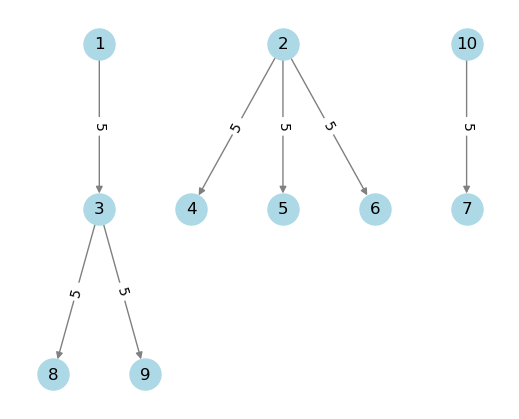

In [5]:
plt.figure(figsize=(5, 4))
T = Gc.copy()
pos = nx.nx_agraph.graphviz_layout(T, prog="dot")  # Uses Graphviz for tree layout
nx.draw(T, pos, with_labels=True, node_size=500, node_color="lightblue", edge_color="gray")
# Draw edge labels (weights)
edge_labels = {(u, v): T[u][v]['weight'] for u, v in T.edges()}
nx.draw_networkx_edge_labels(T, pos, edge_labels=edge_labels, font_color='black', font_size=10)

plt.show()

In [26]:
# Tree Graph Example
edge_bundle = [(1,2,{'weight':5}),
               (1,3,{'weight':5}), # !
                # branch 1
               (2,4,{'weight':5}),
               (2,5,{'weight':5}),
               (2,6,{'weight':5}),
                # branch 2
               (10,7,{'weight':5}),
               (3,7,{'weight':5}), # !
               (3,8,{'weight':5}),
               (3,9,{'weight':5}),
               ]
#for e in edge_bundle:
G = nx.DiGraph()
G.add_edges_from(edge_bundle)
print(G, G.size('weight'))
temporary_edge_bundle = [(7,1, {'weight':1})]

DiGraph with 10 nodes and 9 edges 45.0


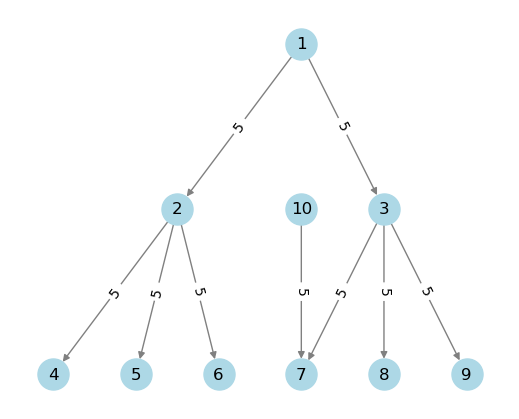

In [27]:
plt.figure(figsize=(5, 4))
T = G.copy()
pos = nx.nx_agraph.graphviz_layout(T, prog="dot")  # Uses Graphviz for tree layout
nx.draw(T, pos, with_labels=True, node_size=500, node_color="lightblue", edge_color="gray")
# Draw edge labels (weights)
edge_labels = {(u, v): T[u][v]['weight'] for u, v in T.edges()}
nx.draw_networkx_edge_labels(T, pos, edge_labels=edge_labels, font_color='black', font_size=10);

In [28]:
Gc = dns.cycle_cancelling(G, temporary_edge_bundle )
print(Gc, Gc.size('weight'))

DiGraph with 10 nodes and 9 edges 43.0


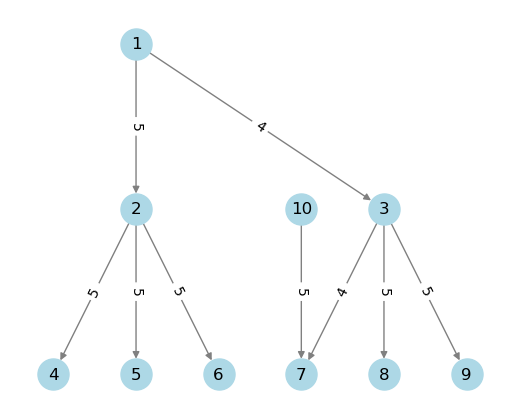

In [29]:
plt.figure(figsize=(5, 4))
T = Gc.copy()
pos = nx.nx_agraph.graphviz_layout(T, prog="dot")  # Uses Graphviz for tree layout
nx.draw(T, pos, with_labels=True, node_size=500, node_color="lightblue", edge_color="gray")
# Draw edge labels (weights)
edge_labels = {(u, v): T[u][v]['weight'] for u, v in T.edges()}
nx.draw_networkx_edge_labels(T, pos, edge_labels=edge_labels, font_color='black', font_size=10)

plt.show()